In [1]:
import math
import numpy as np
from scipy import optimize

%matplotlib inline
import matplotlib.pyplot as plt

# The Pizza Problem 🍕

Stel je voor dat het vrijdagavond is en je favoriete pizzeria heeft een speciale aanbieding: twee 12" pizza's voor de prijs van één 18" pizza. Laten we voor het gemak zeggen dat een 18" pizza 10 euro kost. Is dit een goede aanbieding?

![](pizza_problem_guest_martin_2020.png)

Het antwoord is... dat ligt er aan. Deze vraag is eens op twitter gesteld en er kwamen verrassend veel verschillende antwoorden (Guest & Martin, 2020). Sommigen vonden van wel, anderen hadden goede redenen waarom dat niet zo was. Zo zei iemand dat twee pizzas meer is dan een, maar een ander merkte op dat de grote pizza in totaal meer pizza is dan de twee kleine.

Welke optie je moet kiezen ligt aan waar je het meeste waarde aan hecht. Welke optie heeft het grootste nut (utility)? 

## Q1.a (5 pts)

Schrijf een _Utility Functie_ `def more_is_better()`, die een persoon beschrijft die zo veel mogelijk pizza wil hebben voor z'n geld. Voor deze persoon is het nut van een pizza uitgedrukt in de oppervlakte. Welke optie kiest deze persoon? 

ps. 12" pizza betekent een diameter van 12" inch, en input van deze functie is aantal en diameter

In [186]:
def more_is_better(aantal, diameter):
    surface = [(np.pi * (dia / 2)**2) * amount for amount, dia in zip(aantal, diameter)]
    return (max(surface), np.argmax(surface))

aantal, diameter = [2,1], [12,18]
max_surface, max_index = more_is_better(aantal, diameter)
print("De pizza optie met de hoogste oppervlakte is {} pizza('s) met diameter {}, deze heeft een oppervlakte van {:.2f}"
      .format(aantal[max_index], diameter[max_index], max_surface))

De pizza optie met de hoogste oppervlakte is 1 pizza('s) met diameter 18, deze heeft een oppervlakte van 254.47


Als psycholoog heb ik een theorie dat de personen die voor twee pizzas gaan de korst lekkerder vinden dan de pizza zelf. Ik wil kijken of deze theorie dan ook het gedrag van deze mensen kan verklaren.
Voor deze persoon is het totale nut van een pizza uitgedrukt in het nut van de korst plus het nut van de pizza binnenkant.

## Q1.b (5 pts)
Schrijf een _Utilitiy Functie_ `def crust_is_better()` die een persoon beschrijft die eigenlijk meer houdt van de korst dan van de pizza. (input functie is aantal en diameter)

Laten we er van uit gaan dat de korst 1 inch dik is. Hoeveel keer moet een persoon de korst op z'n minst lekkerder vinden, om te kiezen voor de optie met twee pizzas? (ongeveer antwoord is goed, maar parameter kan geoptimaliseerd worden). 


In [187]:
def crust_is_better(aantal, diameter):
    korst_dikte = 1
    pizza, korst, totaal = [], [], []
    for amount, dia in zip(aantal, diameter):
        pizza_binnenkant_surface = more_is_better([amount], [dia - korst_dikte * 2])[0]
        pizza.append(pizza_binnenkant_surface)
        korst_surface = more_is_better([amount], [dia])[0] - pizza_binnenkant_surface
        korst.append(korst_surface)
        totaal.append(pizza_binnenkant_surface + korst_surface)
    best = np.argmax(totaal)
    verschil_korst = abs(korst[best] - korst[(best+1)%2])
    verschil_totaal = totaal[best] - totaal[(best+1)%2]
    keer_zo_lekker = verschil_totaal / verschil_korst + 1
    return (best, keer_zo_lekker)
    
aantal = [2,1]
diameter = [12,18]
best, crave = crust_is_better(aantal, diameter)
print("De persoon kan de optie met {} pizza('s) lekkerder vinden als deze persoon de korst {:.2f} keer zo lekker vindt"
     .format(aantal[(best+1)%2], crave))

De persoon kan de optie met 2 pizza('s) lekkerder vinden als deze persoon de korst 2.80 keer zo lekker vindt


Dit is een hypothetisch voorbeeld van hoe een psychologische theorie keuzegedrag kan formaliseren met een wiskundige formule. Dit kan heel erg behulpzaam zijn, want als deze zo precies opgeschreven is maakt deze ook hele precieze voorspellingen en kan deze ook makkelijk getoetst worden in de toekomst. 

## Q1.c (5 pts)
Stel dat je tot de hypothese gekomen bent dat mensen de korst van de pizza 3 keer zo lekker vinden als de binnenkant. Zal een persoon nog liever drie pizzas van 9 inch willen? 

In [49]:
aantal = [3,1]
diameter = [9,18]
best, crave = crust_is_better(aantal, diameter)
print("De persoon kan de optie met {} pizza('s) lekkerder vinden als deze persoon de korst {:.2f} keer zo lekker vindt"
     .format(aantal[(best+1)%2], crave))

De persoon kan de optie met 3 pizza('s) lekkerder vinden als deze persoon de korst 3.89 keer zo lekker vindt


> Dit betekent dat de persoon de korst 3.89 keer zo lekker moet vinden. 3.89 > 3. Dus nee de persoon heeft niet liever 3 pizza's van 9 inch 

# Een loterij 💰 

Zoals in het college besproken is, worden loterijen vaak gebruikt om te bestuderen hoe mensen met onzekerheid omgaan. De hoofdprijs winnen in een loterij is fantastisch, maar het is heel onzeker (de kans is klein) dat je deze ook echt wint. Hier gaan we kort kijken naar deze modellen en deze toepassen op jouw eigen keuzes, om beter te begrijpen hoe jij met risico/onzerkerheid om gaat. 

## mini-experiment
In de bijlage `Risk_Q.pdf` vind je een lijst met keuzes tussen twee loterijen, zoals in het figuur hieronder. Voor elke loterij zijn er telkens twee mogelijke uitkomsten, aan jou de vraag welke loterij je zou kiezen als je er een moest uitkiezen. Kijk goed naar de uitkomsten en kansen en vink aan welke loterij je kiest.

![](loterij.png)


Als je alle keuzes gemaakt hebt, maak dan een tab delimited .txt bestand met de volgende structuur:

    p1,o1,p2,o2: p's and o's of gamble 1  (p is probability, o is outcome)
    p3,o3,p4,o4: p's and o's of gamble 2 
    decision: choice (1 = gamble 1, 2 = gamble 2)

Vul in het door jouw gemaakte file al jouw keuzes in.

![](example_data.png)

## Q2 (5 pts)

In het voorbeeld zie je de header en daaronder een regel met de loterij en keuze van figuur 1. Vul je keuzes ook in, in de file `data_self.txt` en sla de file op als `studentnummer_data.txt` 

> Files moeten aanwezig zijn en er logisch uitzien, maar keuzes worden dus niet gecontroleerd

# Prospect Theory

Prospect theory, ook wel cumulative prospect therory (CPT), is een theorie die beschrijft hoe mensen uitkomsten en waarschijnlijkheden afwegen om tot een beslissing te komen. Het gebruikt hiervoor een combinatie van vier verschillende functies:

1. Een functie die objectieve uitkomsten transformeert naar subjectieve waarde (V1)
2. Een functie die waarschijnlijkheid transformeert naar subjectieve waarschijnlijkheid (W1)
3. Een functie die subjectieve waarden en waarschijnlijkheden van een optie integreert tot een subjectieve verwachte waarde (EV)
4. Een beslis regel die uitrekent met welke waarschijnlijkheid een van twee opties word gekozen (Softmax)

## Q3.a (10 pts)

Schrijf voor elke van deze 4 functies een functie in Python. Geef bij elke functie aan welke vrije variabelen deze heeft en wat die betekenen.


In [143]:
def V1(x, a, b, l):
    if x >= 0:
        ans = x**a
    else:
        ans = -l*(-x)**b
    return ans
# t is de x, op de x-as. A en b bepalen het verloop van de grafiek. En l is de loss aversion coëfficient

In [70]:
def W1(p,g):
    return (p**g) / (p**g+(1-p**g)**g)**(1/g)
# p is de kans en g is de probability weight

In [166]:
def EV(x1, px1, x2, px2):
    return x1 * px1 + x2 * px2
# x zijn twee utility values en p is de kans

In [74]:
def softmax(t, R, S):
    return 1 / (1 + math.e**(-t*(R - S)))
# t is de weight, dus hoeveel waarde wordt gehecht aan het verschillen tussen risico en safe. 
# en R en S zijn weer twee utility values

## Q3.b (5 pts)

Plot de V1 functie voor objectieve waardes tussen 0 en 1000, gebruik makende van verschillende waarden van $\alpha$, en label deze lijnen voor:

$$\alpha \in \{0.5, 0.9, 1.3, 1.7\}$$

*Hint:* Gebruik [vectorize](https://docs.scipy.org/doc/numpy/reference/generated/numpy.vectorize.html) om een bestaande functie op een gehele [ndarray](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.html) tegelijk te kunnen toepassen, en zo alle subjectieve waardes in 1 keer uit te rekenen.

De meeste mensen zijn risicomijdend, waar ligt dus voor de meeste mensen de waarde van $\alpha$? 

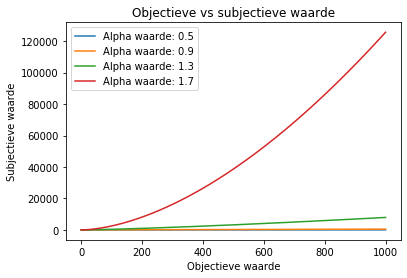

In [84]:
x = np.arange(0,1000)
lijst_alpha = [0.5, 0.9, 1.3, 1.7]
for a in lijst_alpha:
    vec = np.vectorize(V1)
    v = np.array(vec(x, a, 0, 0))
    plt.plot(x, v, label="Alpha waarde: {}".format(a))

plt.xlabel("Objectieve waarde")
plt.ylabel("Subjectieve waarde")
plt.title("Objectieve vs subjectieve waarde")
plt.legend()
plt.show()
# Een hoge alpha. Mensen hechten over het algemeen eerder een hoge subjectieve waarde aan een hoge objectieve waarde

> 

## Q3.c (5 pts)

Plot de V1 functie voor objectieve waardes tussen 0 en -1000, gebruik makende van verschillende waarden van $\beta$ en $\lambda$, en label deze lijnen voor:

$$\beta \in \{0.5, 0.9\}$$
$$\lambda \in \{0.5, 1.5\}$$

De meeste mensen vinden verliezen van 10 euro relatief erger dan dat ze blij zijn met het winnen van 10 euro, waar ligt dus voor de meeste mensen de waarde van $\lambda$?  

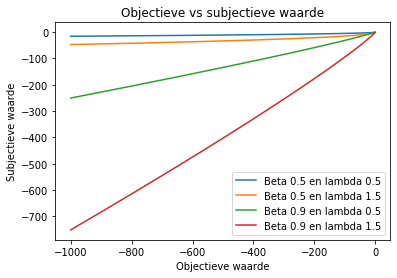

In [94]:
x = np.arange(-1000,0)
lijst_beta = [0.5, 0.9]
lijst_lambda = [0.5, 1.5]
vec = np.vectorize(V1)
for b in lijst_beta:
    for l in lijst_lambda:
        v = np.array(vec(x, 0, b, l))
        plt.plot(x, v, label="Beta {} en lambda {}".format(b,l))

plt.xlabel("Objectieve waarde")
plt.ylabel("Subjectieve waarde")
plt.title("Objectieve vs subjectieve waarde")
plt.legend()
plt.show()

# Erger vinden om eenzelfde bedrag te verliezen heeft te maken met de lambda waarde. 
# Voor de meeste mensen zouden ze een hoge lambda waarde hebben (dus in dit geval 1.5).

## Q3.d (5 pts)

Plot de W1 functie voor waarschijnlijkheden tussen $0.1$ en $0.9$, gebruik makende van verschillende waarden van $\gamma$, en label deze lijnen.

Bij welke waarde vind je het gebruikelijke patroon dat mensen kleine waarschijnlijkheden meer waarde toekennen en grote waarschijnlijkheden juist minder? (zie grafiek in college slides, plot ook een identity line $(x=y)$).

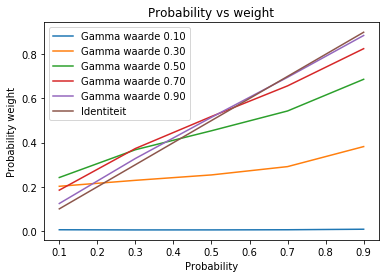

In [112]:
gamma_lijst = np.linspace(0.1, 0.9, 5)
vec = np.vectorize(W1)
for g in gamma_lijst:
    w = np.array(vec(gamma_lijst, g))
    plt.plot(gamma_lijst, w, label=("Gamma waarde {:.2f}".format(g)))

plt.plot(gamma_lijst, gamma_lijst, label="Identiteit")
plt.title("Probability vs weight")
plt.xlabel("Probability")
plt.ylabel("Probability weight")
plt.legend()
plt.show()

# Hier is te zien dat deze handeling plaatsvindt vanaf een gamma waarde van ongeveer 0.3

## Q3.e (5 pts)

Laten we nu kijken hoe verschillende parameter waarden kunnen leiden tot verschillende keuzes. Laten we er voor het gemak even van uit gaan dat de proefpersoon altijd simpelweg de optie kiest met de hoogste verwachte uitkomst (geen softmax). Beschouw de volgende twee opties:

    A: 1% kans op 1000 euro, en anders niets 
    B: 50% kans op 20 euro, en anders niets

Vergelijk de uitkomsten voor de 4 mogelijke combinaties van $\alpha \in \{0.3, 1.5\}$ en $\gamma \in \{0.5, 1.0\}$ en vertel welke loterij door de proefpersoon verkozen wordt. 

In [148]:
alpha_lijst = [0.3, 1.5]
gamma_lijst = [0.5, 1.0]
vec_v = np.vectorize(V1)
vec_w = np.vectorize(W1)
for a in alpha_lijst:
    for g in gamma_lijst:
        v1 = np.array(vec_v(1000, a, 0, 0))
        w1 = np.array(vec_w(0.1, g))
        v2 = np.array(vec_v(20, a, 0, 0))
        w2 = np.array(vec_w(0.5, g))
        if v1 * w1 > v2 * w2:
            best = 'A'
        else:
            best = 'B'
        print("De beste optie voor alpha {} en gamma {}, is optie {}".format(a, g, best))
        
# De proefpersoon zal dus voor optie A kiezen, deze is namelijk 3 van de 4 keer als beste optie naar voren gekomen.

De beste optie voor alpha 0.3 en gamma 0.5, is optie A
De beste optie voor alpha 0.3 en gamma 1.0, is optie B
De beste optie voor alpha 1.5 en gamma 0.5, is optie A
De beste optie voor alpha 1.5 en gamma 1.0, is optie A


# Model fitting

We gaan nu kijken naar de resultaten van een echt experiment. We hebben namelijk de data van een aantal proefpersonen die een heel aantal gambles gedaan heeft. In de data file kunnen we terugvinden welke van de twee opties zij gekozen hebben. We gaan kijken hoe goed CPT het gedrag van de proefpersonen kan voorspellen en wat voor parameter waardes dit oplevert. De data file die we zullen gebruiken is `data_LC5.txt`:

    Data Coding:
    Subject: is subject nr.
    p1,o1,p2,o2: p's and o's of gamble 1  (p is probability, o is outcome)
    p3,o3,p4,o4: p's and o's of gamble 2 
    decision: choice (1 = gamble 1, 2 = gamble 2)
   
Elke gamble wordt beschreven, net als hierboven, door twee probabilities en twee outcomes. 
Schrijf een `CPT_fit` functie, zodat je het model op de data van de proefpersonen kan fitten. 
We gaan voor het fitten van het model gebruik maken van [optimize.minimize](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html) en we gaan proberen de Log Likelihood te maximaliseren.

In het databestand van de proefpersoon kunnen we zien welke van de 2 loterijen de proefpersoon koos. Wat we op elke trial willen weten, is wat de waarschijnlijkheid is dat het model dezelfde keuze maakt als de proefpersoon. Hoe groter die kans, hoe beter het model fit.

## Q4  (20 pts)

Schrijf de functie `CPT_fit`.
    
* Gegeven een set parameters $\alpha$, $\beta$, $\lambda$, $\gamma$ en $\theta$, bereken voor elk van de loterijen in het bestand:
    * De subjectieve waarde van de uitkomsten
    * De subjectieve waarschijnlijkheden
    * De subjectieve verwachte waarde voor een loterij
    * De (softmax) waarschijnlijkheid dat de eerste of de tweede loterij wordt gekozen
    * De waarschijnlijkheid die correspondeert met de daadwerkelijk gemaakte keuze
* De som van de logaritmes van deze waarschijnlijkheden geeft de Log Likelihood voor deze parameters.
* Vermenigvuldig dit resultaat nog met $-1$, gegegeven dat we dit willen maximaliseren ipv minimaliseren.

Gebruik als startwaarden $\alpha=0.5$, $\beta=0.5$, $\lambda=0.5$, $\gamma=0.5$ en $\theta=0.05$, en gebruik [Nelder-Mead](https://docs.scipy.org/doc/scipy/reference/optimize.minimize-neldermead.html#optimize-minimize-neldermead) als de methode voor de minimalisatie.

Welke parameterwaarden fitten de data van de proefpersonen het beste? 

Als we deze parameters voor waar aannemen, hoe kijken deze proefpersonen tegen winsten en verliezen aan? En hoe wegen deze personen waarschijnlijkheden?


In [196]:
with open("data_LC5.txt") as f:
    data = np.loadtxt(f, dtype=float, delimiter="\t", skiprows=1)
    
def CPT_fit(params):
    [a, b, l, g, t] = params
    LL = 0
    for row in data:
        result = [row[4], row[6],row[8],row[10]]
        prob = [row[3],row[5],row[7],row[9]]
        V = [V1(value, a, b, l) for value in result]
        W = [W1(value, g) for value in prob]
        EV1 = EV(V[0],W[0],V[1],W[1])
        EV2 = EV(V[2],W[2],V[3],W[3])
        New = [softmax(t, EV1,EV2), softmax(t, EV2,EV1)]
        Best = New[int(row[12]-1)]
        LL += np.log(Best)
    return -1*LL

In [197]:
opt = optimize.minimize(CPT_fit, np.array([0.5, 0.5, 0.5,0.5,0.05]), method='Nelder-Mead', options={'disp':True})
param = opt['x']
print("Alpha waarde  {:.3f}\nBeta waarde   {:.3f}\nLambda waarde {:.3f}\nGamma waarde  {:.3f}\nTheta waarde  {:.3f}"
      .format(param[0],param[1],param[2],param[3],param[4]))

Optimization terminated successfully.
         Current function value: 772.939470
         Iterations: 432
         Function evaluations: 689
Alpha waarde  0.780
Beta waarde   0.756
Lambda waarde 1.437
Gamma waarde  0.892
Theta waarde  0.045


> De lambda parameter is vrij hoog, dit betekent dat de proefpersonen vrij risicoavers zijn. Ook vinden mensen verliezen zwaarder wegen dan winnen. Mensen overschatten kleine waarschijnlijkheden en onderschatten grote waarschijnlijkheden, kortom niet wiskundig optimaal

# Prisoners Dilemma Competitie. 
We hebben in het college over social decision-making onder andere het prisoners dilemma game besproken. Kijk het voor de zekerheid nog een keer na. We gaan het nu met z'n allen spelen. Open hiervoor het `competition.ipynb` 